In [ ]:
!unzip result_new_eval_2.zip

Archive:  result_new_eval_2.zip
   creating: result_new/
   creating: result_new/eval_1-network-type/
  inflating: result_new/eval_1-network-type/facebook686_random_random_random.txt  
  inflating: result_new/eval_1-network-type/facebook686_random_random_random_rumor_matrix.txt  
  inflating: result_new/eval_1-network-type/new_fb_100_nodes.jpg  
  inflating: result_new/eval_1-network-type/new_random_100_nodes.jpg  
  inflating: result_new/eval_1-network-type/new_scale_free_100_nodes.jpg  
  inflating: result_new/eval_1-network-type/new_small_world_100_nodes.jpg  
  inflating: result_new/eval_1-network-type/random_random_random_random.txt  
  inflating: result_new/eval_1-network-type/random_random_random_random_rumor_matrix.txt  
  inflating: result_new/eval_1-network-type/scaleFree_random_random_random.txt  
  inflating: result_new/eval_1-network-type/scaleFree_random_random_random_rumor_matrix.txt  
  inflating: result_new/eval_1-network-type/smallWorld_random_random_random.txt  
  in

# Graph Illustration

In [ ]:
def gprah_properties(G):
  # Basic properties
  print("Number of nodes:", G.number_of_nodes())
  print("Number of edges:", G.number_of_edges())
  print("Graph density:", nx.density(G))
  print("Is the graph directed?:", nx.is_directed(G))
  print("Is the graph connected?:", nx.is_connected(G) if not G.is_directed() else "Not applicable for directed graphs")

  # Degree statistics
  degrees = [deg for _, deg in G.degree()]
  print("Minimum degree:", min(degrees))
  print("Maximum degree:", max(degrees))
  print("Average degree:", sum(degrees) / G.number_of_nodes())

  # Clustering
  print("Average clustering coefficient:", nx.average_clustering(G))

  # Diameter (only for connected graphs)
  if nx.is_connected(G):
      print("Graph diameter:", nx.diameter(G))
  else:
      print("Graph is not connected, so no diameter.")

  # Shortest path properties
  if nx.is_connected(G):
      print("Average shortest path length:", nx.average_shortest_path_length(G))
  else:
      print("Graph is not connected, so no average shortest path length.")

  # Degree distribution
  degree_histogram = nx.degree_histogram(G)
  print("Degree histogram (distribution of degrees):", degree_histogram)

  # Assortativity
  print("Degree assortativity coefficient:", nx.degree_assortativity_coefficient(G))

  # Components (for disconnected graphs)
  if not nx.is_connected(G):
      connected_components = list(nx.connected_components(G))
      print("Number of connected components:", len(connected_components))
      print("Size of the largest connected component:", max(len(c) for c in connected_components))

(a) Erdős–Rényi
Network
Number of nodes: 100
Number of edges: 396
Graph density: 0.08
Is the graph directed?: False
Is the graph connected?: True
Minimum degree: 3
Maximum degree: 16
Average degree: 7.92
Average clustering coefficient: 0.08191899766899761
Graph diameter: 4
Average shortest path length: 2.4244444444444446
Degree histogram (distribution of degrees): [0, 0, 0, 1, 4, 12, 17, 16, 14, 13, 8, 4, 4, 3, 2, 1, 1]
Degree assortativity coefficient: 0.0012024800038166275


 (b) Scale-Free
Network
Number of nodes: 100
Number of edges: 390
Graph density: 0.07878787878787878
Is the graph directed?: False
Is the graph connected?: True
Minimum degree: 4
Maximum degree: 36
Average degree: 7.8
Average clustering coefficient: 0.16166889605700402
Graph diameter: 4
Average shortest path length: 2.365050505050505
Degree histogram (distribution of degrees): [0, 0, 0, 0, 32, 19, 13, 5, 8, 3, 1, 2, 1, 3, 0, 2, 2, 1, 1, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Degree assortativity co

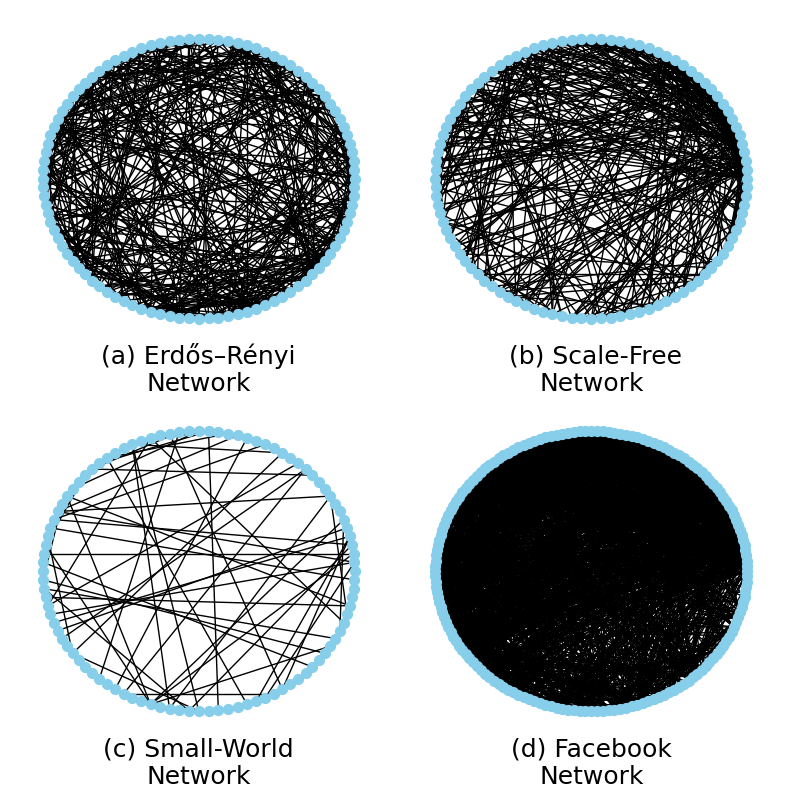

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (network_name, filepath) in enumerate(zip(['(a) Erdős–Rényi\nNetwork', ' (b) Scale-Free\nNetwork', '(c) Small-World\nNetwork', '(d) Facebook\nNetwork'],['Social_Graph_random.graphml', 'Social_Graph_sc.graphml', 'Social_Graph_sw.graphml', 'Social_Graph_FB_686.graphml'])):
  # Load the graph from the .graphml file
  G = nx.read_graphml(filepath)

  # Graph Properties
  print(network_name)
  gprah_properties(G)
  print('\n')


  # Draw the graph
  ax = axes[i // 2, i % 2]
  pos = nx.circular_layout(G) #nx.spring_layout(G, seed=42)
  nx.draw(G, pos, ax=ax, with_labels=False, labels=nx.get_node_attributes(G, 'label'), node_color='skyblue', node_size=50, edge_color='k', font_weight='bold')
  ax.set_title(f'{network_name}', fontsize=18, y=-0.15)

plt.tight_layout()
# plt.savefig("Social_Graph.png")
plt.show()



997
500
500
500
{'Erdős–Rényi': [4.0, 28.0, 0, 8.0], 'Scale-Free': [8.0, 29.0, 0, 4.0], 'Small-World': [0, 50.0, 0, 14.0], 'Facebook': [3.57, 1.19, 0, 0.6]}


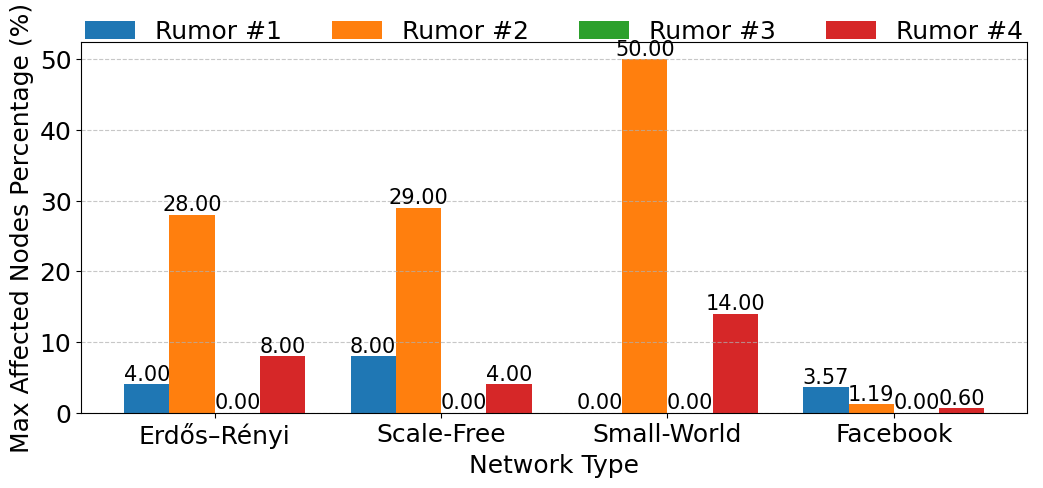

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt

def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices


def count_rumors(matrix):
  column_sums = np.sum(matrix, axis=0)
  return [round(z,2) for z in 100*column_sums/len(matrix)]


# Collect max spreding for each network
max_spreding = {}

for network_name,network_type in zip(['Erdős–Rényi', 'Scale-Free', 'Small-World', 'Facebook'], ['random', 'scaleFree', 'smallWorld', 'facebook686']):
  filename = f'result_new/eval_1-network-type/{network_type}_random_random_random_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  print(len(matrices_all))
  max_affected = [0,0,0,0] # initailize with 0 affected
  starting_point = 497 if network_name == 'Erdős–Rényi' else 0
  for matrix_i in matrices_all[starting_point:]:
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[network_name] = max_affected

print(max_spreding)

# Extract keys and values
categories = list(max_spreding.keys())
values = np.array(list(max_spreding.values()))

# Number of clusters and bars per cluster
n_clusters = len(categories)
n_bars = values.shape[1]

# Generate positions for the bars
x = np.arange(n_clusters)
bar_width = 0.2
offsets = np.arange(-(n_bars // 2), (n_bars // 2) + 1) * bar_width

# Create the plot
plt.figure(figsize=(11, 5))
fontsize = 18

for i in range(n_bars):
    bars = plt.bar(x + offsets[i], values[:, i], width=bar_width, label=f'Rumor #{i+1}')
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=fontsize-3
        )

# Add labels, title, and legend
adjusted_ticks = x + offsets[1] + bar_width / 2
plt.xticks(adjusted_ticks, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Network Type', fontsize=fontsize)
plt.ylabel('Max Affected Nodes Percentage (%)', fontsize=fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=fontsize, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

{'Erdős–Rényi': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 17

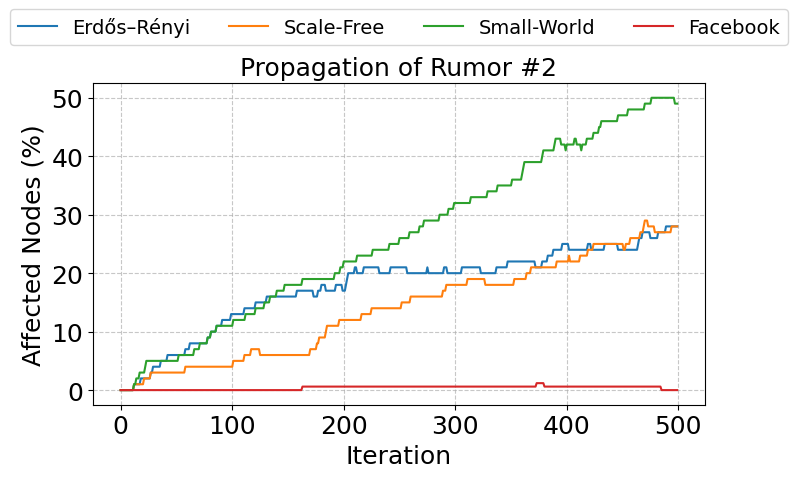

In [ ]:
# Collect max spreding for each network
rumor_slected = 2 # this is Rumor #2
rumor_spreding = {}

for network_name,network_type in zip(['Erdős–Rényi', 'Scale-Free', 'Small-World', 'Facebook'], ['random', 'scaleFree', 'smallWorld', 'facebook686']):
  rumor_spreding_net = []
  filename = f'result_new/eval_1-network-type/{network_type}_random_random_random_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  starting_point = 497 if network_name == 'Erdős–Rényi' else 0
  for matrix_i in matrices_all[starting_point:]:
    rumor_spreding_net.append(count_rumors(matrix_i)[rumor_slected-1])
  rumor_spreding[network_name] = rumor_spreding_net

print(rumor_spreding)
# print(len(rumor_spreding['Erdős–Rényi']))

# Plot each key-value pair as a line
plt.figure(figsize=(8, 5))
fontsize = 18
for key, values in rumor_spreding.items():
    plt.plot(values, label=key)

# Add labels, title, legend, and grid
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Affected Nodes (%)', fontsize=fontsize)
plt.title(f'Propagation of Rumor #{rumor_slected}', fontsize=fontsize)
plt.legend(loc='center', fontsize=fontsize-4, ncol=4, bbox_to_anchor=(0.5, 1.175))
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Eval 2

{'random_random': [8.0, 29.0, 0, 4.0], 'random_mff': [28.0, 54.0, 1.0, 3.0], 'mff_random': [0, 5.0, 0, 1.0], 'mff_mff': [0, 0, 0, 0]}


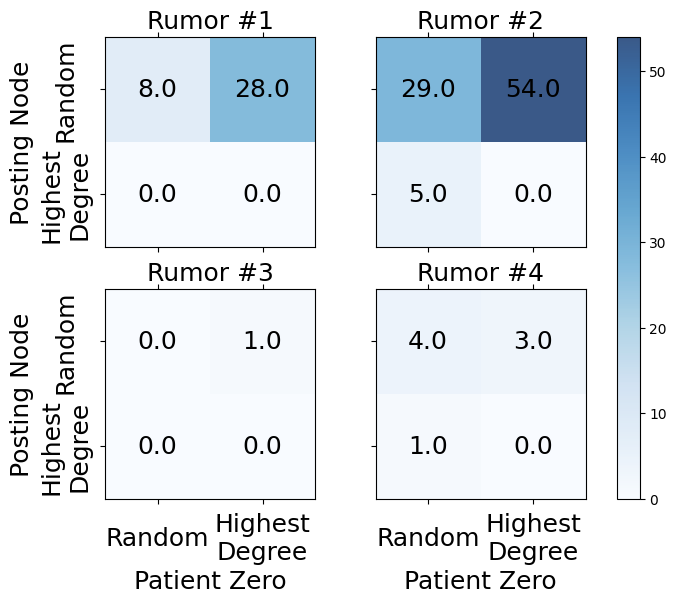

In [ ]:
max_spreding = {}

for patient_zero, post_freq in [['random', 'random'], ['random', 'mff'], ['mff', 'random'], ['mff', 'mff']]:
  filename = f'result_new/eval_2-rumor-initialization-and-spread/scaleFree_{patient_zero}_{post_freq}_random_rumor_matrix.txt'
  matrices_all = read_matrices_from_file(filename)
  max_affected = [0,0,0,0] # initailize with 0 affected
  for matrix_i in matrices_all:
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[f'{patient_zero}_{post_freq}'] = max_affected

print(max_spreding)


# Extract patient zero and posting node values
patient_zero = ['Random', 'Highest\nDegree']
posting_node = ['Random', 'Highest\nDegree']

# Initialize data for confusion matrices
confusion_matrices = []

# Extract data for each rumor
for rumor_idx in range(4):
    matrix = np.array([
        [max_spreding['random_random'][rumor_idx], max_spreding['random_mff'][rumor_idx]],
        [max_spreding['mff_random'][rumor_idx], max_spreding['mff_mff'][rumor_idx]]
    ])
    confusion_matrices.append(matrix)

# Define a global color range for uniform coloring across all matrices
vmin = min(min(values) for values in max_spreding.values())
vmax = max(max(values) for values in max_spreding.values())

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fontsize = 18
# fig.suptitle('Confusion Matrices per Rumor (Scale-Free)', fontsize=fontsize+2, x=0.45, y=1.05)

for i, ax in enumerate(axes.flat):
    matrix = confusion_matrices[i]
    cax = ax.matshow(matrix, cmap='Blues', alpha=0.8, vmin=vmin, vmax=vmax)

    # Add labels and title
    ax.set_title(f'Rumor #{i+1}', fontsize=fontsize)
    if i>1: ax.set_xlabel('Patient Zero', fontsize=fontsize)
    if i==0 or i==2: ax.set_ylabel('Posting Node', fontsize=fontsize)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    if i==2 or i==3:
      ax.set_xticklabels(patient_zero, fontsize=fontsize, ha='center', va='center')
      ax.xaxis.set_tick_params(labelbottom=True, labeltop=False)
    else: ax.set_xticklabels([], fontsize=fontsize)
    ax.xaxis.set_tick_params(pad=25)
    if i==0 or i==2: ax.set_yticklabels(posting_node, fontsize=fontsize, rotation=90, ha='center', va='center')
    else: ax.set_yticklabels([], fontsize=fontsize, rotation=90)
    ax.yaxis.set_tick_params(pad=25)

    # Annotate the confusion matrix with values
    for (x, y), value in np.ndenumerate(matrix):
        ax.text(y, x, f'{value:.1f}', ha='center', va='center', fontsize=fontsize)

# Add a colorbar
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=1)

# plt.tight_layout(pad=8, rect=[0, 0, 0.95, 1])
plt.show()

# Eval 3

{'allBelieve': [4.0, 98.0, 0, 57.0], 'random': [8.0, 29.0, 0, 4.0], 'allNotBelieve': [0, 0, 0, 0]}


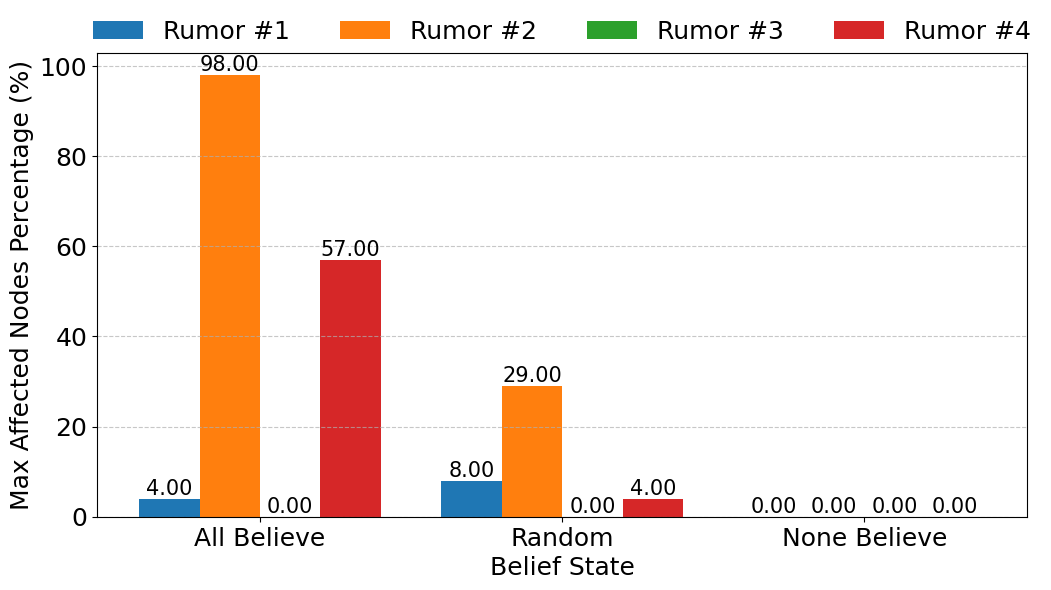

In [ ]:
# Collect max spreding for each network
max_spreding = {}

for belief_state in ['allBelieve', 'random', 'allNotBelieve']:
  filename = f'result_new/eval_3-agent-design/scaleFree_random_random_{belief_state}_rumor_matrix.txt'
  matrices_all =read_matrices_from_file(filename)
  max_affected = [0,0,0,0] # initailize with 0 affected
  for matrix_i in matrices_all:
    max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
  max_spreding[belief_state] = max_affected

print(max_spreding)

# Extract keys and values
cat_map = {'allBelieve':'All Believe', 'allNotBelieve':'None Believe', 'random':'Random'}
categories = [cat_map[xx] for xx in max_spreding.keys()]
values = np.array(list(max_spreding.values()))

# Number of clusters and bars per cluster
n_clusters = len(categories)
n_bars = values.shape[1]

# Generate positions for the bars
x = np.arange(n_clusters)
bar_width = 0.2
offsets = np.arange(-(n_bars // 2), (n_bars // 2) + 1) * bar_width

# Create the plot
plt.figure(figsize=(11, 6))
fontsize = 18

for i in range(n_bars):
    bars = plt.bar(x + offsets[i], values[:, i], width=bar_width, label=f'Rumor #{i+1}')
    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=fontsize-3
        )

# Add labels, title, and legend
adjusted_ticks = x + offsets[1] + bar_width / 2
plt.xticks(adjusted_ticks, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Belief State', fontsize=fontsize)
plt.ylabel('Max Affected Nodes Percentage (%)', fontsize=fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=fontsize, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

# Visualization

KeyboardInterrupt: 

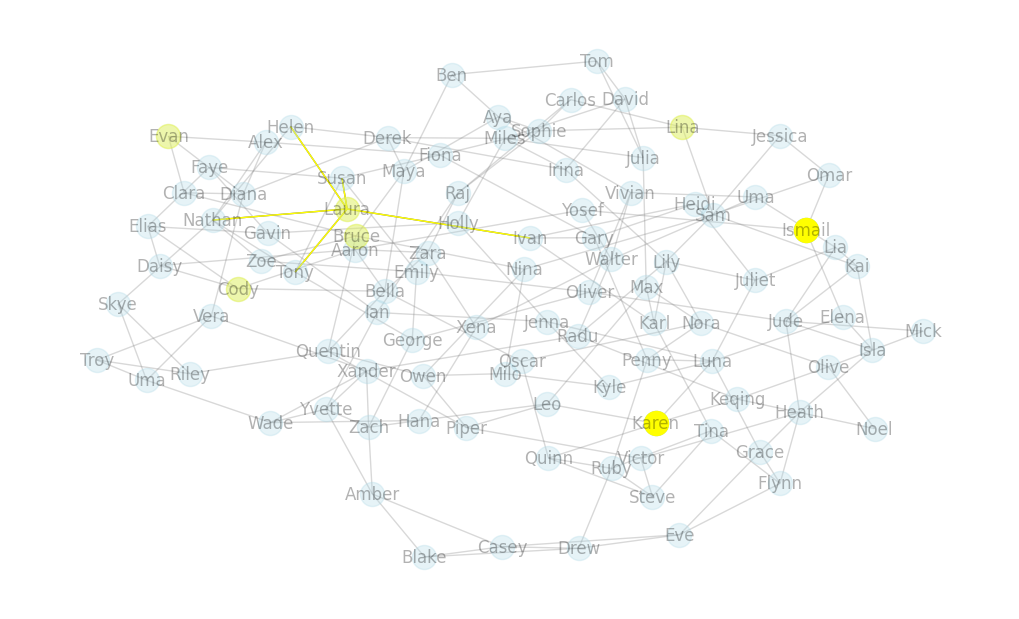

In [ ]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def read_matrices_from_file(file_path):
  matrices = []  # List to store all matrices

  with open(file_path, 'r') as file:
    content = file.read().strip()  # Read the entire file and remove any trailing newlines or spaces

    # Split the content into blocks based on the double newline separating matrices
    matrix_blocks = content.split('\n\n\n')

    for block in matrix_blocks:
      # Split each block into lines, and then split each line into numbers (integers 0 or 1)
      matrix = []
      for line in block.splitlines():
        # Convert each line to a list of integers
        row = list(map(int, line.split()))  # Parsing 0s and 1s as integers
        matrix.append(row)

      # Convert to a NumPy array (optional, depending on how you want to use the matrices)
      matrix_array = np.array(matrix)
      matrices.append(matrix_array)

  return matrices

# Example usage
file_path = 'result_new/eval_1-network-type/smallWorld_random_random_random_rumor_matrix.txt'  # Replace with the path to your text file
matrices = read_matrices_from_file(file_path)

# # Printing the matrices for demonstration
# for idx, matrix in enumerate(matrices):
#     print(f"Matrix {idx + 1}:\n{matrix}\n")

# Specify Actor per Iteration:
# actors = ['2', '2', '5', '1', '2', '3', '9', '3', '7', '0', '4', '5', '0', '5', '2', '8', '5', '5', '9', '6', '6', '5', '4', '2', '5']
# List to store the picked agents
file_path = 'result_new/eval_1-network-type/smallWorld_random_random_random.txt'
actors = []

# Reading the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check for the specific phrase and extract the agent number
        if "Pick agent" in line and "to act" in line:
            # Extract the agent number and append it as a string to the list
            agent_number = line.split("Pick agent")[1].split("to act")[0].strip()
            actors.append(agent_number)

# Specify the directory path to save pngs
directory = "./rumor_spread_visualization"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Load the graph from the .graphml file
file_path = 'Social_Graph_sw.graphml'  # Update with the path to your .graphml file
G = nx.read_graphml(file_path)

# Fixing the position of nodes to maintain consistent layout
# pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)

for idx in range(len(matrices)):

  # Draw the graph
  plt.figure(figsize=(10, 6))

  # Plot all nodes and edges with default colors
  nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='lightblue', edge_color='gray', alpha=0.3)

  # Define nodes and edges with full opaque (current actors and neighbors)
  opaque_edges = [(actors[idx], x) for x in list(G.neighbors(actors[idx]))]  # Update with your edge pairs

  # Opaque specified nodes and edges
  nx.draw_networkx_nodes(G, pos, nodelist=actors[idx], node_color='lightblue')
  nx.draw_networkx_edges(G, pos, edgelist=opaque_edges, edge_color='gray')

  # Define nodes and edges to highlight (rumor-spreading)
  highlight_nodes = [str(x) for x in np.where(matrices[idx][:,1]==1)[0]]  # Update with your node identifiers
  # Highlight affected nodes and edges appropriately
  nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='yellow', alpha=0.3)
  if actors[idx] in highlight_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=actors[idx], node_color='yellow')
    nx.draw_networkx_edges(G, pos, edgelist=opaque_edges, edge_color='yellow')

  # plt.title(f'Iteration {idx+1}', fontsize=18)
  plt.savefig(f'{directory}/Iteration_{idx}.png')
  # plt.show()
  plt.close()

# Final Snapshot
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='lightblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='yellow')
# plt.title(f'Final Snapshot', fontsize=18)
plt.savefig(f'{directory}/Iteration_{idx+1}.png')
plt.show()

In [ ]:
from PIL import Image
import os

def create_gif_with_last_frame_delay(image_folder, gif_name, frame_duration=50, last_frame_duration=30):
    # Get the list of images in the folder
    images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort the images by their file name (to ensure correct order)
    images = sorted(images, key=lambda x: int(x.split('_')[1].split('.')[0]))
    print(images)

    # Load images
    frames = [Image.open(os.path.join(image_folder, image)) for image in images]

    # Create a duration list where the last frame has a longer duration
    durations = [frame_duration] * (len(frames) - 1) + [last_frame_duration]

    # # Extend the last frame for the delay
    # for _ in range(delay_frames):
    #     frames.append(frames[-1])

    # Save the frames as a GIF
    frames[0].save(
        gif_name,
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=durations,
        loop=0
    )

# Example usage
image_folder = "./rumor_spread_visualization"  # The folder where the images are stored
gif_name = 'output_with_delay.gif'  # The name of the output GIF file
frame_duration = 1  # Duration of each frame in milliseconds
last_frame_duration = 6000  # Number of times to repeat the last frame for delay effect

create_gif_with_last_frame_delay(image_folder, gif_name, frame_duration, last_frame_duration)

In [ ]:
import cv2
import os

def create_video_with_last_frame_delay(image_folder, video_name, frame_rate=30, delay_frames=30):
    # Get the list of images in the folder
    images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort the images by their file name (to ensure correct order)
    images = sorted(images, key=lambda x: int(x.split('_')[1].split('.')[0]))
    print(images)

    # Read the first image to get the frame size
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, layers = frame.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
    video = cv2.VideoWriter(video_name, fourcc, frame_rate, (width, height))

    # Loop through all the images and write them to the video
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        video.write(frame)  # Add each frame to the video

    # Add the last frame multiple times to create a delay effect
    last_frame_path = os.path.join(image_folder, images[-1])
    last_frame = cv2.imread(last_frame_path)

    for _ in range(delay_frames):  # Repeat the last frame `delay_frames` times
        video.write(last_frame)

    # Release the VideoWriter object
    video.release()

# Example usage
image_folder = "./rumor_spread_visualization"  # The folder where the images are stored
video_name = 'output_video_with_delay.mp4'  # The name of the output video file
frame_rate = 50  # Frames per second
delay_frames = 1  # Number of times to repeat the last frame (this will control how long the delay is)

create_video_with_last_frame_delay(image_folder, video_name, frame_rate, delay_frames)


# NEW Eval 2

In [ ]:
!unzip result_new_eval_2.zip

Archive:  result_new_eval_2.zip
replace result_new/eval_1-network-type/facebook686_random_random_random.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Original

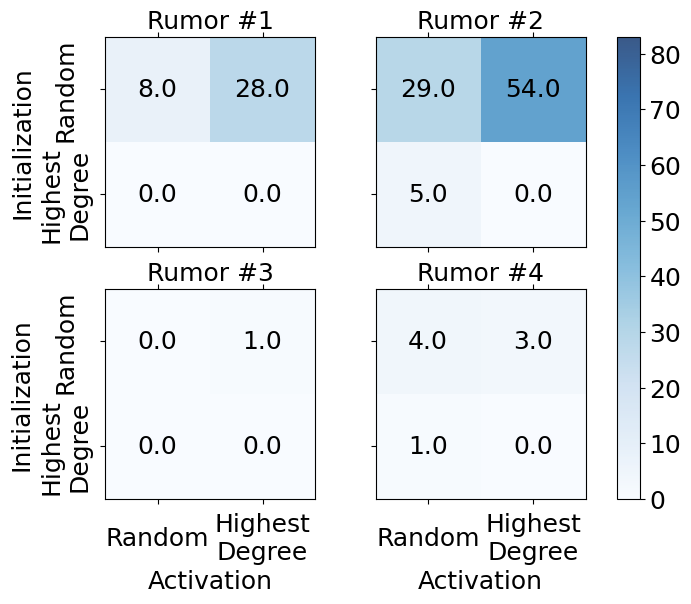

In [ ]:
max_spreding = {}

for patient_zero, post_freq in [['random', 'random'], ['random', 'mff'], ['mff', 'random'], ['mff', 'mff']]:
  spread_algo_list = ['', '_top5'] if post_freq=='mff' else ['']
  for spread_algo in spread_algo_list:
    filename = f'result_new/eval_2-rumor-initialization-and-spread/scaleFree_{patient_zero}_{post_freq}_random{spread_algo}_rumor_matrix.txt'
    matrices_all = read_matrices_from_file(filename)
    max_affected = [0,0,0,0] # initailize with 0 affected
    for matrix_i in matrices_all:
      max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
    max_spreding[f'{patient_zero}_{post_freq}{spread_algo}'] = max_affected


# Extract patient zero and posting node values
patient_zero = ['Random', 'Highest\nDegree']
posting_node = ['Random', 'Highest\nDegree']

# Initialize data for confusion matrices
confusion_matrices = []

# Extract data for each rumor
for rumor_idx in range(4):
    matrix = np.array([
        [max_spreding['random_random'][rumor_idx], max_spreding['random_mff'][rumor_idx]],
        [max_spreding['mff_random'][rumor_idx], max_spreding['mff_mff'][rumor_idx]]
    ])
    confusion_matrices.append(matrix)

# # top 5
# for rumor_idx in range(4):
#     matrix = np.array([
#         [max_spreding['random_random'][rumor_idx], max_spreding['random_mff_top5'][rumor_idx]],
#         [max_spreding['mff_random'][rumor_idx], max_spreding['mff_mff_top5'][rumor_idx]]
#     ])
#     confusion_matrices.append(matrix)

# Define a global color range for uniform coloring across all matrices
vmin = min(min(values) for values in max_spreding.values())
vmax = max(max(values) for values in max_spreding.values())

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fontsize = 18
# fig.suptitle('Confusion Matrices per Rumor (Scale-Free)', fontsize=fontsize+2, x=0.45, y=1.05)

for i, ax in enumerate(axes.flat):
    matrix = confusion_matrices[i]
    cax = ax.matshow(matrix, cmap='Blues', alpha=0.8, vmin=vmin, vmax=vmax)

    # Add labels and title
    ax.set_title(f'Rumor #{i+1}', fontsize=fontsize)
    if i>1: ax.set_xlabel('Activation', fontsize=fontsize)
    if i==0 or i==2: ax.set_ylabel('Initialization', fontsize=fontsize)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    if i==2 or i==3:
      ax.set_xticklabels(patient_zero, fontsize=fontsize, ha='center', va='center')
      ax.xaxis.set_tick_params(labelbottom=True, labeltop=False)
    else: ax.set_xticklabels([], fontsize=fontsize)
    ax.xaxis.set_tick_params(pad=25)
    if i==0 or i==2: ax.set_yticklabels(posting_node, fontsize=fontsize, rotation=90, ha='center', va='center')
    else: ax.set_yticklabels([], fontsize=fontsize, rotation=90)
    ax.yaxis.set_tick_params(pad=25)

    # Annotate the confusion matrix with values
    for (x, y), value in np.ndenumerate(matrix):
        ax.text(y, x, f'{value:.1f}', ha='center', va='center', fontsize=fontsize)

# Add a colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=1)
cbar.ax.tick_params(labelsize=fontsize)

# plt.tight_layout(pad=8, rect=[0, 0, 0.95, 1])
plt.show()

## Top 5

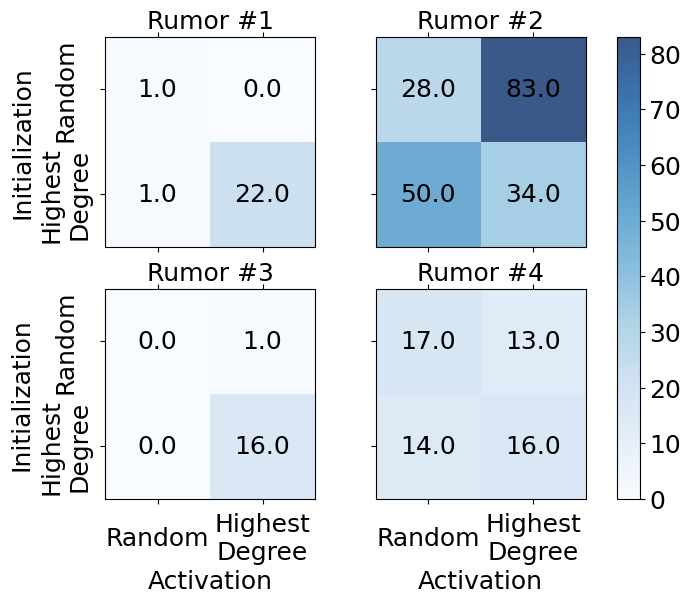

In [ ]:
max_spreding = {}

for patient_zero, post_freq in [['random', 'random'], ['random', 'mff'], ['mff', 'random'], ['mff', 'mff']]:
  spread_algo_list = ['', '_top5']
  for spread_algo in spread_algo_list:
    filename = f'result_new/eval_2-rumor-initialization-and-spread/scaleFree_{patient_zero}_{post_freq}_random{spread_algo}_rumor_matrix.txt'
    matrices_all = read_matrices_from_file(filename)
    max_affected = [0,0,0,0] # initailize with 0 affected
    for matrix_i in matrices_all:
      max_affected = [max(x,y) for x,y in zip(max_affected,count_rumors(matrix_i))]
    max_spreding[f'{patient_zero}_{post_freq}{spread_algo}'] = max_affected


# Extract patient zero and posting node values
patient_zero = ['Random', 'Highest\nDegree']
posting_node = ['Random', 'Highest\nDegree']

# Initialize data for confusion matrices
confusion_matrices = []

# Extract data for each rumor
# for rumor_idx in range(4):
#     matrix = np.array([
#         [max_spreding['random_random'][rumor_idx], max_spreding['random_mff'][rumor_idx]],
#         [max_spreding['mff_random'][rumor_idx], max_spreding['mff_mff'][rumor_idx]]
#     ])
#     confusion_matrices.append(matrix)

# top 5
for rumor_idx in range(4):
    matrix = np.array([
        [max_spreding['random_random_top5'][rumor_idx], max_spreding['random_mff_top5'][rumor_idx]],
        [max_spreding['mff_random_top5'][rumor_idx], max_spreding['mff_mff_top5'][rumor_idx]]
    ])
    confusion_matrices.append(matrix)

# Define a global color range for uniform coloring across all matrices
vmin = min(min(values) for values in max_spreding.values())
vmax = max(max(values) for values in max_spreding.values())

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fontsize = 18
# fig.suptitle('Confusion Matrices per Rumor (Scale-Free)', fontsize=fontsize+2, x=0.45, y=1.05)

for i, ax in enumerate(axes.flat):
    matrix = confusion_matrices[i]
    cax = ax.matshow(matrix, cmap='Blues', alpha=0.8, vmin=vmin, vmax=vmax)

    # Add labels and title
    ax.set_title(f'Rumor #{i+1}', fontsize=fontsize)
    if i>1: ax.set_xlabel('Activation', fontsize=fontsize)
    if i==0 or i==2: ax.set_ylabel('Initialization', fontsize=fontsize)
    ax.set_xticks(range(2))
    ax.set_yticks(range(2))
    if i==2 or i==3:
      ax.set_xticklabels(patient_zero, fontsize=fontsize, ha='center', va='center')
      ax.xaxis.set_tick_params(labelbottom=True, labeltop=False)
    else: ax.set_xticklabels([], fontsize=fontsize)
    ax.xaxis.set_tick_params(pad=25)
    if i==0 or i==2: ax.set_yticklabels(posting_node, fontsize=fontsize, rotation=90, ha='center', va='center')
    else: ax.set_yticklabels([], fontsize=fontsize, rotation=90)
    ax.yaxis.set_tick_params(pad=25)

    # Annotate the confusion matrix with values
    for (x, y), value in np.ndenumerate(matrix):
        ax.text(y, x, f'{value:.1f}', ha='center', va='center', fontsize=fontsize)

# Add a colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=1)
cbar.ax.tick_params(labelsize=fontsize)

# plt.tight_layout(pad=8, rect=[0, 0, 0.95, 1])
plt.show()

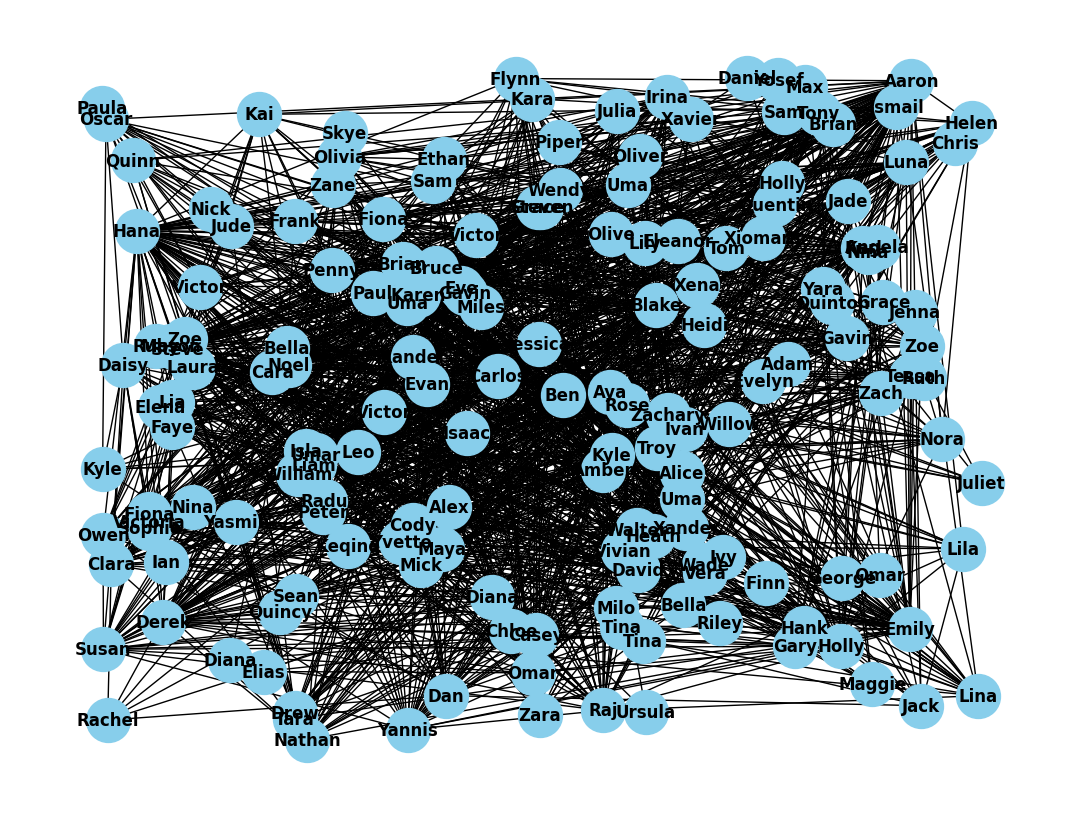

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the .graphml file
file_path = "/content/Social_Graph_FB_686.graphml"
graph = nx.read_graphml(file_path)

# Plot the graph
plt.figure(figsize=(10.64, 8))
pos = nx.random_layout(graph)  # Generate positions for the nodes
# nx.draw(graph, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw(graph, pos, with_labels=True, labels=nx.get_node_attributes(graph, 'label'), node_color='skyblue', node_size=1000, edge_color='k', font_weight='bold')

# plt.title("Graph Visualization")
plt.show()
